In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from pandas_datareader import data
import yfinance as yf

In [36]:
data_inicio = '2000-01-01'
data_fim = '2021-09-30'

In [47]:
df = data.DataReader('petr4.sa', 'yahoo', data_inicio, data_fim)
df['data_pregao'] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,data_pregao
Date,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,3.538944e+10,3.598474,2000-01-03
2000-01-04,5.550000,5.550000,5.550000,5.550000,2.886144e+10,3.399409,2000-01-04
2000-01-05,5.494000,5.494000,5.494000,5.494000,4.303360e+10,3.365108,2000-01-05
2000-01-06,5.475000,5.475000,5.475000,5.475000,3.405568e+10,3.353473,2000-01-06
2000-01-07,5.500000,5.500000,5.500000,5.500000,2.091264e+10,3.368784,2000-01-07
...,...,...,...,...,...,...,...
2021-09-24,27.059999,26.469999,26.549999,26.900000,4.482150e+07,26.900000,2021-09-24
2021-09-27,27.459999,26.500000,27.139999,27.139999,8.917870e+07,27.139999,2021-09-27
2021-09-28,27.889999,26.719999,27.190001,26.959999,1.178743e+08,26.959999,2021-09-28


In [48]:
selic = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=04/01/2000&dataFinal=30/09/2021')
selic['data'] = selic['data'].str.replace('/', '-')
selic['data'] = pd.to_datetime(selic['data'], format='%d-%m-%Y')
selic['data'] = pd.to_datetime(selic["data"].dt.strftime('%Y-%m-%d'))
selic = selic.rename(columns={'valor':'SELIC', 'data': 'data_pregao'})
selic['mm5D_selic'] = selic['SELIC'].rolling(5).mean()
selic['mm21D_selic'] = selic['SELIC'].rolling(21).mean()
selic

,data_pregao,SELIC,mm5D_selic,mm21D_selic
0,2000-01-04,0.069186,NaN,NaN
1,2000-01-05,0.069220,NaN,NaN
2,2000-01-06,0.069286,NaN,NaN
3,2000-01-07,0.069286,NaN,NaN
4,2000-01-10,0.069120,0.069220,NaN
...,...,...,...,...
5457,2021-09-24,0.023687,0.021433,0.020288
5458,2021-09-27,0.023687,0.022184,0.020467
5459,2021-09-28,0.023687,0.022936,0.020646
5460,2021-09-29,0.023687,0.023687,0.020825


In [59]:
selic_bov = (df.merge(selic, on='data_pregao', how='left', suffixes=('', '_y'))
     .rename(lambda x: x.replace('_y', ''), axis=1))
selic_bov.tail(10)

,High,Low,Open,Close,Volume,Adj Close,data_pregao,SELIC,mm5D_selic,mm21D_selic
5453,26.020000,24.770000,25.969999,24.930000,131694100.0,24.930000,2021-09-17,0.019930,0.019930,0.019930
5454,24.650000,23.790001,24.080000,24.650000,80260600.0,24.650000,2021-09-20,0.019930,0.019930,0.019930
5455,25.290001,24.530001,25.080000,25.209999,64570200.0,25.209999,2021-09-21,0.019930,0.019930,0.019930
5456,26.219999,25.520000,25.530001,25.850000,70231800.0,25.850000,2021-09-22,0.019930,0.019930,0.019930
5457,26.950001,25.910000,25.950001,26.840000,84480600.0,26.840000,2021-09-23,0.023687,0.020681,0.020109
5458,27.059999,26.469999,26.549999,26.900000,44821500.0,26.900000,2021-09-24,0.023687,0.021433,0.020288
5459,27.459999,26.500000,27.139999,27.139999,89178700.0,27.139999,2021-09-27,0.023687,0.022184,0.020467
5460,27.889999,26.719999,27.190001,26.959999,117874300.0,26.959999,2021-09-28,0.023687,0.022936,0.020646
5461,27.530001,26.820000,27.209999,27.389999,58731700.0,27.389999,2021-09-29,0.023687,0.023687,0.020825
5462,27.580000,27.170000,27.530001,27.230000,65744000.0,27.230000,2021-09-30,0.023687,0.023687,0.021003


In [65]:
an = pd.DataFrame()

In [66]:
an['SELIC'] = selic_bov['SELIC']

In [67]:
an['Adj Close'] = selic_bov['Adj Close']

In [68]:
an.index = selic_bov['data_pregao']

In [69]:
an.dropna(inplace=True)

array([<AxesSubplot:xlabel='data_pregao'>,
       <AxesSubplot:xlabel='data_pregao'>], dtype=object)

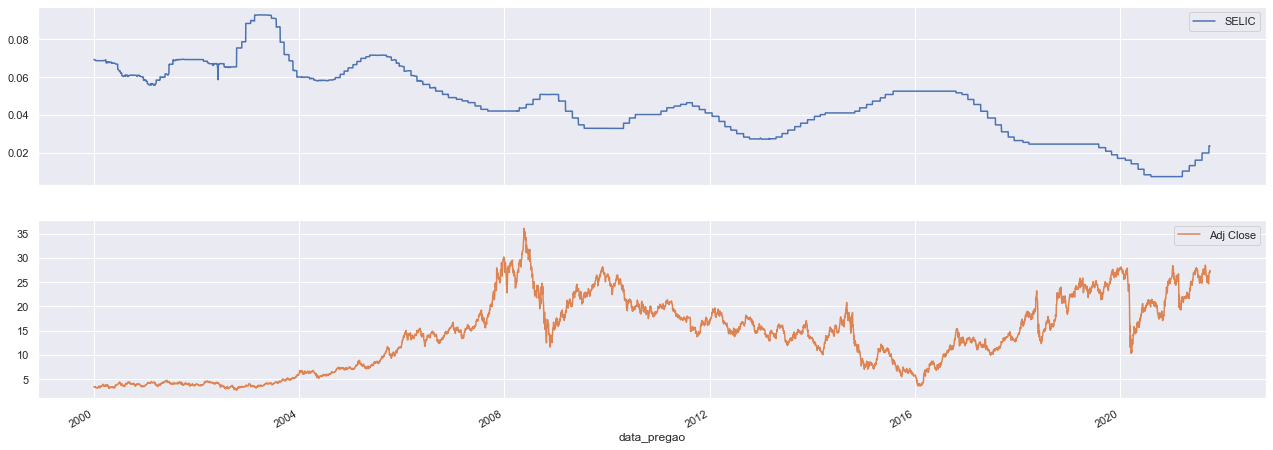

In [70]:
sns.set_theme()
an.plot(subplots=True, figsize=(22,8))

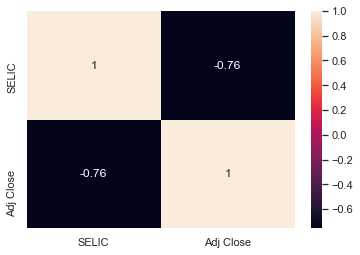

In [71]:
sns.heatmap(an.corr(), annot=True);

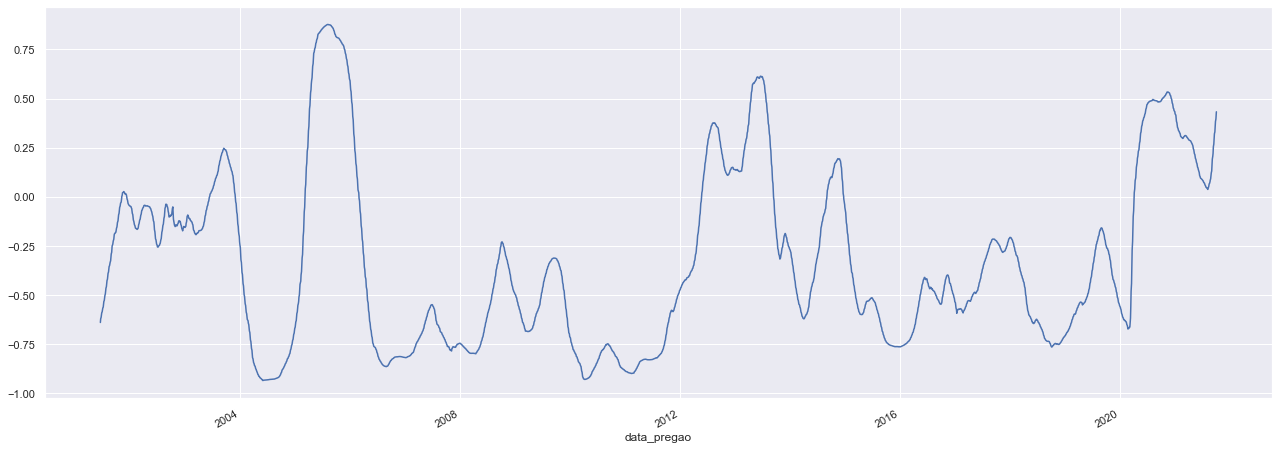

In [75]:
an["SELIC"].rolling(366).corr(an["Adj Close"]).plot(figsize=(22,8));